<a href="https://colab.research.google.com/github/goltsovamaria932/ML_2025_autumn/blob/main/Homework-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [65]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [66]:
def max_element(arr):
    zero_mask = arr[:-1] == 0

    if not np.any(zero_mask):
        return None

    elements_after_zeros = arr[1:][zero_mask]

    return np.max(elements_after_zeros)

x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
result = max_element(x)
print(result)

5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [67]:
def nearest_value(X, v):
    absolute_diff = np.abs(X - v)
    min_diff = np.min(absolute_diff)
    nearest_elements = X[absolute_diff == min_diff]

    return nearest_elements[0]

X = np.arange(0,10).reshape((2, 5))
v = 3.6
result = nearest_value(X, v)
print(result)

4


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [69]:
def scale(X):
    column_means = np.mean(X, axis=0)
    column_stds = np.std(X, axis=0)

    safe_stds = np.where(column_stds == 0, 1, column_stds)

    scaled_X = (X - column_means) / safe_stds

    return scaled_X

X = np.random.randint(0, 10, size=(4, 5))
print(X)

scaled_result = scale(X)
print(scaled_result)

[[8 2 0 7 9]
 [2 4 2 6 3]
 [5 7 8 0 8]
 [1 2 2 3 5]]
[[ 1.46059349 -0.85518611 -1.          1.09544512  1.15311332]
 [-0.73029674  0.12216944 -0.33333333  0.73029674 -1.36277029]
 [ 0.36514837  1.58820278  1.66666667 -1.46059349  0.73379939]
 [-1.09544512 -0.85518611 -0.33333333 -0.36514837 -0.52414242]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [70]:
import numpy as np

def get_stats(X):

    if X.shape[0] != X.shape[1]:
        raise ValueError("Матрица должна быть квадратной")

    stats = {}

    # Определитель
    stats['determinant'] = np.linalg.det(X)

    # След матрицы
    stats['trace'] = np.trace(X)

    # Наименьший и наибольший элементы
    stats['min_element'] = np.min(X)
    stats['max_element'] = np.max(X)

    # Норма Фробениуса
    stats['frobenius_norm'] = np.linalg.norm(X, 'fro')

    # Собственные числа
    stats['eigenvalues'] = np.linalg.eigvals(X)

    # Обратная матрица
    if stats['determinant'] != 0:
        stats['inverse'] = np.linalg.inv(X)
    else:
        stats['inverse'] = None

    return stats

X = np.random.normal(10, 1, size=(3, 3))
print(X)
print("\n")

stats = get_stats(X)

print(f"1. Определитель: {stats['determinant']:.6f}")
print(f"2. След матрицы: {stats['trace']:.6f}")
print(f"3. Наименьший элемент: {stats['min_element']:.6f}")
print(f"4. Наибольший элемент: {stats['max_element']:.6f}")
print(f"5. Норма Фробениуса: {stats['frobenius_norm']:.6f}")
print(f"6. Собственные числа: {[f'{val:.6f}' for val in stats['eigenvalues']]}")

if stats['inverse'] is not None:
    print("7. Обратная матрица:")
    print(stats['inverse'])
else:
    print("7. Обратная матрица: не существует (определитель = 0)")

[[12.21969785 10.23980106  9.64291072]
 [11.07049103  8.93668905 10.77465722]
 [11.31906556  9.62205155 10.70708837]]


1. Определитель: -10.788224
2. След матрицы: 31.863475
3. Наименьший элемент: 8.936689
4. Наибольший элемент: 12.219698
5. Норма Фробениуса: 31.638909
6. Собственные числа: ['31.550126', '0.762056', '-0.448706']
7. Обратная матрица:
[[ 0.74047295  1.56224706 -2.23898321]
 [-0.3175987  -2.0104001   2.30911963]
 [-0.4973818   0.15513055  0.38523356]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [72]:
max_elements = []

for exp_num in range(100):
    A = np.random.randn(10, 10)
    B = np.random.randn(10, 10)

    C = np.dot(A, B)

    max_element = np.max(C)

    max_elements.append(max_element)

max_elements = np.array(max_elements)

mean_max = np.mean(max_elements)

quantile_95 = np.percentile(max_elements, 95)

print(f"Среднее значение максимальных элементов: {mean_max:.4f}")
print(f"95-процентная квантиль: {quantile_95:.4f}")

Среднее значение максимальных элементов: 8.5113
95-процентная квантиль: 12.0034


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [73]:
import pandas as pd

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [74]:
avia = pd.read_csv('2008.csv')
avia

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


In [75]:
cancellation_counts = avia['CancellationCode'].value_counts()

print(cancellation_counts)

most_common_cancellation = cancellation_counts.index[0]
most_common_count = cancellation_counts.iloc[0]

print(f"\nСамая частая причина отмены: '{most_common_cancellation}' ({most_common_count} отмен)")

cancellation_codes = {
    'A': 'Airline/Carrier (Авиакомпания)',
    'B': 'Weather (Погода)',
    'C': 'National Air System (Национальная воздушная система)',
    'D': 'Security (Безопасность)'
}

if most_common_cancellation in cancellation_codes:
    print(f"Расшифровка: {cancellation_codes[most_common_cancellation]}")

CancellationCode
A    563
B    549
C    299
Name: count, dtype: int64

Самая частая причина отмены: 'A' (563 отмен)
Расшифровка: Airline/Carrier (Авиакомпания)


**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [76]:
distance_stats = avia['Distance'].describe()

print(f"Среднее расстояние: {distance_stats['mean']:.2f} миль")
print(f"Минимальное расстояние: {distance_stats['min']:.2f} миль")
print(f"Максимальное расстояние: {distance_stats['max']:.2f} миль")
print(f"Медианное расстояние: {distance_stats['50%']:.2f} миль")
print(f"Стандартное отклонение: {distance_stats['std']:.2f} миль")

Среднее расстояние: 724.51 миль
Минимальное расстояние: 31.00 миль
Максимальное расстояние: 4962.00 миль
Медианное расстояние: 575.00 миль
Стандартное отклонение: 565.49 миль


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [77]:
min_distance = avia['Distance'].min()
print(f"Минимальное расстояние в данных: {min_distance} миль")

min_distance_flights = avia[avia['Distance'] == min_distance]
print(f"\nКоличество рейсов с минимальным расстоянием: {len(min_distance_flights)}")

print("\n")
print(min_distance_flights[['Year', 'Month', 'DayofMonth', 'Origin', 'Dest', 'FlightNum', 'Distance']])
same_flights_other_days = avia[
    (avia['FlightNum'].isin(min_distance_flights['FlightNum'])) &
    (avia['Distance'] != min_distance)
]
print(same_flights_other_days[['Year', 'Month', 'DayofMonth', 'Origin', 'Dest', 'FlightNum', 'Distance']])

Минимальное расстояние в данных: 31 миль

Количество рейсов с минимальным расстоянием: 6


       Year  Month  DayofMonth Origin Dest  FlightNum  Distance
1116   2008     12          30    WRG  PSG         65        31
6958   2008     12          26    WRG  PSG         65        31
17349  2008      8          18    PSG  WRG         64        31
27534  2008      3          11    PSG  WRG         64        31
46082  2008      8           9    WRG  PSG         65        31
48112  2008      2          28    PSG  WRG         64        31
       Year  Month  DayofMonth Origin Dest  FlightNum  Distance
501    2008      3          20    ATL  IAD         64       533
1389   2008      3          13    KTN  SEA         64       680
1517   2008      7          10    SEA  KTN         65       680
2619   2008      5          23    LAS  BOS         64      2381
3869   2008      7           1    WRG  KTN         64        82
...     ...    ...         ...    ...  ...        ...       ...
66529  2008  

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [36]:
departure_counts = avia['Origin'].value_counts()

top_airport = departure_counts.index[0]
top_departures = departure_counts.iloc[0]

print(f"Аэропорт с наибольшим количеством вылетов: {top_airport}")
print(f"Количество вылетов: {top_departures}")

Аэропорт с наибольшим количеством вылетов: ATL
Количество вылетов: 4134


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [37]:
avg_airtime = avia.groupby('Origin')['AirTime'].mean()
max_airtime_origin = avg_airtime.idxmax()

print(f"Аэропорт с максимальным средним временем полёта: {max_airtime_origin}")
print(f"\nМаксимальное среднее время полёта: {avg_airtime[max_airtime_origin]}")
print(f"\nСреднее время полёта для всех аэропортов: {avg_airtime}")

Аэропорт с максимальным средним временем полёта: SJU

Максимальное среднее время полёта: 205.2

Среднее время полёта для всех аэропортов: Origin
ABE    88.266667
ABI    36.400000
ABQ    93.454321
ABY    35.714286
ACK    50.800000
         ...    
WRG    18.000000
XNA    85.945736
YAK    35.900000
YKM    79.000000
YUM    47.470588
Name: AirTime, Length: 297, dtype: float64


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [61]:
delayed = avia.assign(Delayed = avia['DepDelay'] > 0)

result = (
    delayed
    .groupby('Origin')
    .filter(lambda x: len(x) >= 1000)
    .groupby('Origin')['Delayed']
    .mean()
)

print(f"Аэропорт с наибольшей долей задержанных рейсов: {result.idxmax()}")
print(f"Доля: {result.max()}")

Аэропорт с наибольшей долей задержанных рейсов: EWR
Доля: 0.5111591072714183


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов.

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [39]:
has_missing_values = avia.isnull().any().any()
print(f"1. Имеются ли в данных пропущенные значения? {'Да' if has_missing_values else 'Нет'}")

total_missing = avia.isnull().sum().sum()
print(f"2. Сколько всего пропущенных элементов в таблице? {total_missing}")

objects_with_missing = avia.isnull().any(axis=1).sum()
print(f"3. Сколько объектов имеют хотя бы один пропуск? {objects_with_missing}")

features_with_missing = avia.isnull().any(axis=0).sum()
print(f"4. Сколько признаков имеют хотя бы одно пропущенное значение? {features_with_missing}")

1. Имеются ли в данных пропущенные значения? Да
2. Сколько всего пропущенных элементов в таблице? 355215
3. Сколько объектов имеют хотя бы один пропуск? 70000
4. Сколько признаков имеют хотя бы одно пропущенное значение? 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [40]:
missing = avia['DepDelay'].isnull().sum()
print(f"Пропуски в DepDelay: {missing} ({missing/len(avia)*100}%)")

if missing > 0:
    missing_data = avia[avia['DepDelay'].isnull()]
    print(f"Из них отменено: {missing_data['Cancelled'].sum()}")
    print(f"Дивертировано: {missing_data['Diverted'].sum()}")

avia_clean = avia[avia['DepDelay'].notna() & (avia['DepDelay'] != 0)].copy()
avia_clean = avia_clean.drop('Cancelled', axis=1, errors='ignore')

X = avia_clean.drop('DepDelay', axis=1)
y = avia_clean['DepDelay']

print(f"Финальный размер: X{X.shape}, y{y.shape}")
print(f"DepDelay: mean={y.mean():.1f}, std={y.std():.1f}, min={y.min():.1f}, max={y.max():.1f}")

Пропуски в DepDelay: 1399 (1.9985714285714287%)
Из них отменено: 1399
Дивертировано: 0
Финальный размер: X(63404, 27), y(63404,)
DepDelay: mean=10.8, std=36.0, min=-45.0, max=1146.0


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать.

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [41]:
avia_clean = avia[avia['DepDelay'].notna() & (avia['DepDelay'] != 0)].drop('Cancelled', axis=1)
X, y = avia_clean.drop('DepDelay', axis=1), avia_clean['DepDelay']

print(f"X{X.shape}, y{y.shape}")
print(f"DepDelay: a={y.mean():.1f}±{y.std():.1f}")

X(63404, 27), y(63404,)
DepDelay: a=10.8±36.0


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [42]:
X = X.drop(columns=['TailNum', 'Year'], errors='ignore')

leakage_features = [
    'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
    'LateAircraftDelay', 'ArrDelay', 'ActualElapsedTime'
]

features_to_exclude = [col for col in leakage_features if col in X.columns]
X = X.drop(columns=features_to_exclude)

print(f"Финальный размер: {X.shape}")

Финальный размер: (63404, 18)


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [62]:
avia

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


In [94]:
X['DepTime_Hour'].hist(bins=20)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Axes: >

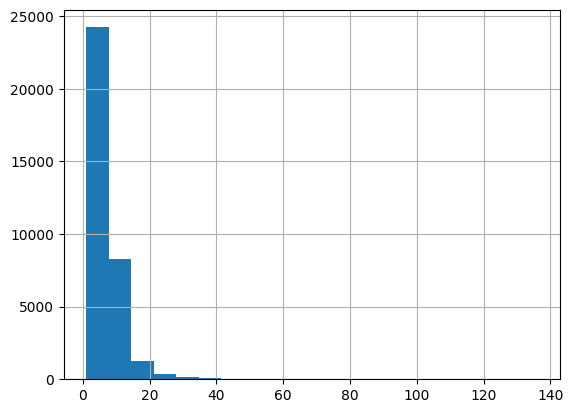

In [21]:
X['TaxiIn'].hist(bins=20)

<Axes: >

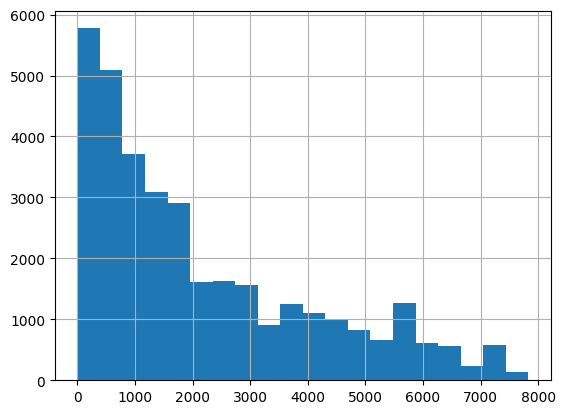

In [22]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer

def transform_data(data):
    data_transformed = data.copy()

    numeric_features = data_transformed.select_dtypes(include=[np.number]).columns
    categorical_features = data_transformed.select_dtypes(include=['object']).columns

    data_transformed[numeric_features] = data_transformed[numeric_features].fillna(0)
    data_transformed[categorical_features] = data_transformed[categorical_features].fillna('nan')

    scaler = StandardScaler()
    scaled_numeric = scaler.fit_transform(data_transformed[numeric_features])
    data_numeric = pd.DataFrame(scaled_numeric,
                               columns=numeric_features,
                               index=data_transformed.index)

    if len(categorical_features) > 0:
        data_categorical = pd.get_dummies(data_transformed[categorical_features],
                                         prefix_sep='_')
    else:
        data_categorical = pd.DataFrame(index=data_transformed.index)

    result = pd.concat([data_numeric, data_categorical], axis=1)

    return result

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [47]:
X_transformed = transform_data(X)

print(f"Исходное количество признаков: {X.shape[1]}")
print(f"Количество признаков после преобразования: {X_transformed.shape[1]}")
print(f"Количество объектов: {X_transformed.shape[0]}")

Исходное количество признаков: 18
Количество признаков после преобразования: 631
Количество объектов: 63404


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)).

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y,
    test_size=0.3,
    random_state=42
)

print(f"Обучающая выборка: {X_train.shape[0]:,} объектов, {X_train.shape[1]} признаков")
print(f"Контрольная выборка: {X_test.shape[0]:,} объектов, {X_test.shape[1]} признаков")
print(f"y_train: {y_train.shape[0]:,} значений")
print(f"y_test: {y_test.shape[0]:,} значений")
print(f"Доля обучающей выборки: {(X_train.shape[0] / len(X_transformed) * 100):.1f}%")
print(f"Доля контрольной выборки: {(X_test.shape[0] / len(X_transformed) * 100):.1f}%")

Обучающая выборка: 44,382 объектов, 631 признаков
Контрольная выборка: 19,022 объектов, 631 признаков
y_train: 44,382 значений
y_test: 19,022 значений
Доля обучающей выборки: 70.0%
Доля контрольной выборки: 30.0%


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sample_size = 1000
X_train_sample = X_train.iloc[:sample_size]
y_train_sample = y_train.iloc[:sample_size]


# Обучаем модель
model = LinearRegression()
model.fit(X_train_sample, y_train_sample)

# Прогнозы на подвыборке обучения и контрольной выборке
y_train_pred = model.predict(X_train_sample)
y_test_pred = model.predict(X_test.iloc[:sample_size])  # берем ту же размерность для сравнения

# Вычисляем метрики
mse_train = mean_squared_error(y_train_sample, y_train_pred)
mse_test = mean_squared_error(y_test.iloc[:sample_size], y_test_pred)
r2_train = r2_score(y_train_sample, y_train_pred)
r2_test = r2_score(y_test.iloc[:sample_size], y_test_pred)

print("\nМетрики качества:")
print(f"MSE на обучающей подвыборке: {mse_train:.2f}")
print(f"MSE на контрольной выборке:  {mse_test:.2f}")
print(f"R² на обучающей подвыборке:  {r2_train:.4f}")
print(f"R² на контрольной выборке:   {r2_test:.4f}")

# Анализ коэффициентов
print(f"\nАнализ коэффициентов модели:")
print(f"Количество коэффициентов: {len(model.coef_)}")
print(f"Минимальный коэффициент: {model.coef_.min():.6f}")
print(f"Максимальный коэффициент: {model.coef_.max():.6f}")
print(f"Среднее абсолютное значение: {np.abs(model.coef_).mean():.6f}")


Метрики качества:
MSE на обучающей подвыборке: 569.30
MSE на контрольной выборке:  1333.52
R² на обучающей подвыборке:  0.4628
R² на контрольной выборке:   -0.2306

Анализ коэффициентов модели:
Количество коэффициентов: 631
Минимальный коэффициент: -51.274490
Максимальный коэффициент: 140.732685
Среднее абсолютное значение: 7.239573


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [51]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score

# Подбор регуляризации
alphas = np.logspace(-3, 3, 20)

def find_best_alpha(model_class, X, y, alphas):
    best_score, best_alpha = -np.inf, None
    for alpha in alphas:
        scores = cross_val_score(model_class(alpha=alpha), X, y, cv=5, scoring='neg_mean_squared_error')
        if scores.mean() > best_score:
            best_score, best_alpha = scores.mean(), alpha
    return best_alpha, -best_score

# Подбор параметров
alpha_lasso, mse_lasso = find_best_alpha(Lasso, X_train_sample, y_train_sample, alphas)
alpha_ridge, mse_ridge = find_best_alpha(Ridge, X_train_sample, y_train_sample, alphas)

print(f"Lasso: alpha={alpha_lasso:.3f}, MSE={mse_lasso:.1f}")
print(f"Ridge: alpha={alpha_ridge:.3f}, MSE={mse_ridge:.1f}")

# Обучение моделей
lasso = Lasso(alpha=alpha_lasso).fit(X_train_sample, y_train_sample)
ridge = Ridge(alpha=alpha_ridge).fit(X_train_sample, y_train_sample)

# Сравнение коэффициентов
models = [('Linear', model), ('Lasso', lasso), ('Ridge', ridge)]
for name, m in models:
    non_zero = np.sum(m.coef_ != 0)
    mean_coef = np.abs(m.coef_).mean()
    print(f"{name}: {non_zero}/250 ненулевых, mean|coef|={mean_coef:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.221e+02, tolerance: 7.307e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.272e+02, tolerance: 7.521e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.567e+02, tolerance: 9.109e

Lasso: alpha=0.336, MSE=953.0
Ridge: alpha=54.556, MSE=933.4
Linear: 494/250 ненулевых, mean|coef|=7.2396
Lasso: 18/250 ненулевых, mean|coef|=0.1101
Ridge: 348/250 ненулевых, mean|coef|=0.4936


__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

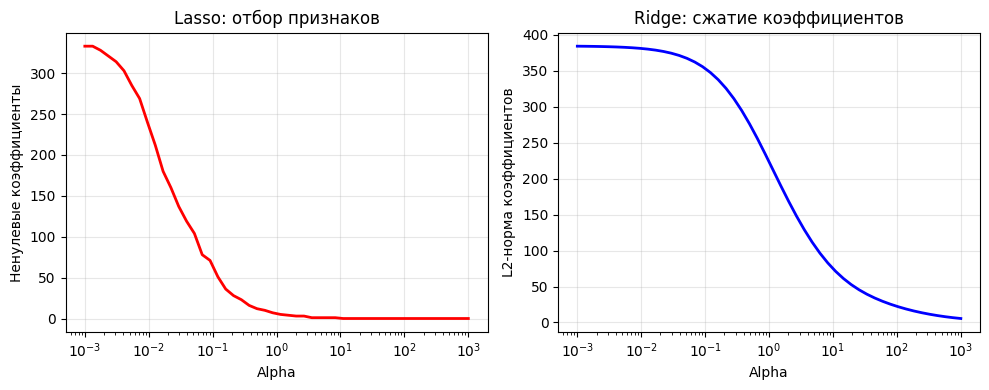

In [59]:
import matplotlib.pyplot as plt
alphas = np.logspace(-3, 3, 50)

# Анализ коэффициентов
lasso_nonzero, ridge_norms = [], []
for alpha in alphas:
    lasso_nonzero.append(np.sum(np.abs(Lasso(alpha=alpha).fit(X_train_sample, y_train_sample).coef_) > 1e-6))
    ridge_norms.append(np.linalg.norm(Ridge(alpha=alpha).fit(X_train_sample, y_train_sample).coef_))

# Главные графики
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.semilogx(alphas, lasso_nonzero, 'r-', linewidth=2)
plt.xlabel('Alpha'), plt.ylabel('Ненулевые коэффициенты')
plt.title('Lasso: отбор признаков'), plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.semilogx(alphas, ridge_norms, 'b-', linewidth=2)
plt.xlabel('Alpha'), plt.ylabel('L2-норма коэффициентов')
plt.title('Ridge: сжатие коэффициентов'), plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Прогнозы Ridge-регрессии
y_pred = ridge.predict(X_test.iloc[:sample_size])

# Вычисление метрик
rmse = np.sqrt(mean_squared_error(y_test.iloc[:sample_size], y_pred))
mae = mean_absolute_error(y_test.iloc[:sample_size], y_pred)
r2 = r2_score(y_test.iloc[:sample_size], y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.4f}")

RMSE: 32.51
MAE:  18.14
R²:   0.0247


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [55]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV, KFold

# Подбор alpha для Ridge
alphas = np.logspace(-3, 3, 50)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Используем RidgeCV для быстрого подбора
ridge_cv = RidgeCV(alphas=alphas, cv=kf, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_sample, y_train_sample)

print(f"Лучший alpha: {ridge_cv.alpha_:.3f}")

# Обучаем с лучшим alpha
ridge_optimized = Ridge(alpha=ridge_cv.alpha_)
ridge_optimized.fit(X_train_sample, y_train_sample)

# Прогнозы и метрики
y_pred_opt = ridge_optimized.predict(X_test.iloc[:sample_size])

rmse_opt = np.sqrt(mean_squared_error(y_test.iloc[:sample_size], y_pred_opt))
mae_opt = mean_absolute_error(y_test.iloc[:sample_size], y_pred_opt)
r2_opt = r2_score(y_test.iloc[:sample_size], y_pred_opt)

print(f"После подбора alpha:")
print(f"RMSE: {rmse_opt:.2f} (было: {rmse:.2f})")
print(f"MAE:  {mae_opt:.2f} (было: {mae:.2f})")
print(f"R²:   {r2_opt:.4f} (было: {r2:.4f})")

Лучший alpha: 79.060
После подбора alpha:
RMSE: 32.47 (было: 32.51)
MAE:  18.07 (было: 18.14)
R²:   0.0270 (было: 0.0247)


__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

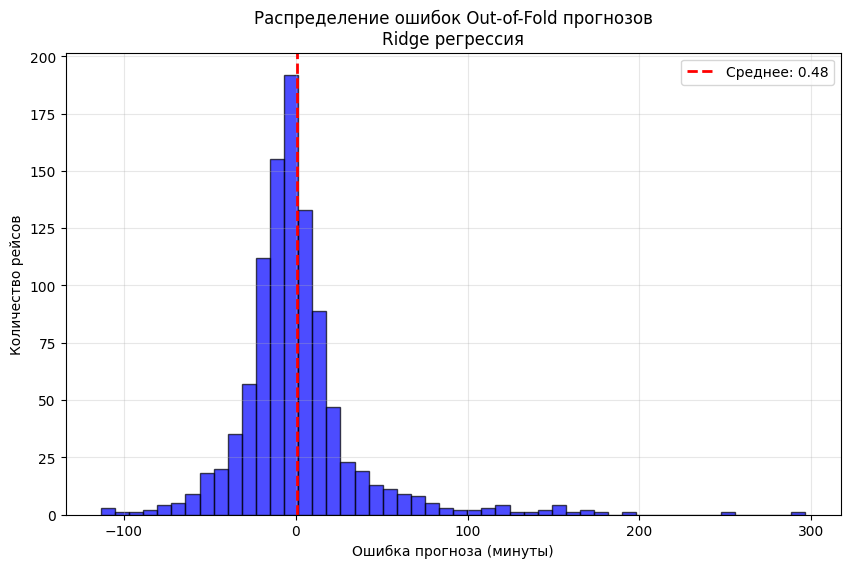

Средняя ошибка: 0.48 минут
Разброс ошибок (STD): 35.56 минут
RMSE: 35.54 минут


In [60]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge

# Out-of-Fold предсказания - получаем прогнозы, где каждый объект предсказан моделью, которая его не видела
ridge = Ridge(alpha=0.215443)
y_oof = cross_val_predict(ridge, X_train_sample, y_train_sample, cv=5)

# Вычисляем ошибки как разницу между фактическими и предсказанными значениями
errors = y_train_sample - y_oof

# Строим гистограмму распределения ошибок
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(errors.mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {errors.mean():.2f}')
plt.xlabel('Ошибка прогноза (минуты)')
plt.ylabel('Количество рейсов')
plt.title('Распределение ошибок Out-of-Fold прогнозов\nRidge регрессия')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"Средняя ошибка: {errors.mean():.2f} минут")
print(f"Разброс ошибок (STD): {errors.std():.2f} минут")
print(f"RMSE: {np.sqrt((errors**2).mean()):.2f} минут")